# Loading a GPT-2 model from Huggingface

While training a model on your laptop is awesome, it is also very slow (and expensive)! Luckily, people with bigger computers and more money have done this already. In this notebook, you will load the GPT-2 model, trained by OpenAI. This model has 1.5 billion parameters and was trained on ~40 GB of data. And even this model, which is many orders of magnitude larger than the one we implemented, is absolutely tiny compared newer models like GPT-4 

#### Image showing the evolution of LLMs in terms of the number of parameters

![Size of LLMs](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F91508b45-a749-4afe-95a4-7d4ec3943ed8_1048x588.png)

## Load the models

Start by running these cells to install the necessary libraries and load the pre-trained GPT-2 model

In [14]:
!pip install transformers matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [15]:
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM

In [16]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')

## Generate text

We will now generate some text! Change the parameters and see what the model actually outputs

In [17]:
### YOUR CODE HERE ###

text = "Once upon a time"   # change the input text here
temperature = 1.0           # change the temperature here. 
                            # This determines how random the text generation is. 
                            # Lower values are more deterministic, higher values are more random.

### END CODE HERE ###

encoded_input = tokenizer(text, return_tensors='pt')
input_ids = encoded_input['input_ids']
attn_mask = encoded_input['attention_mask']
gen_tokens = model.generate(
    input_ids, 
    attention_mask=attn_mask,
    pad_token_id=tokenizer.eos_token_id,
    do_sample=True,
    temperature=temperature,
    max_length=100
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]
print(gen_text)

Once upon a time the world began to move ever more decisively towards the annihilation of the human species. The ancient gods of the Ancient Kingdom were given great powers to summon forth the spirit of some kind of human being, even a god like a god. Thus, according to legend, the Old Ones had come into this world by means of their divine powers, thus leading them to the destruction and destruction of human culture.

After the downfall of the Old Ones, several aspects of the human race began


## Next-word prediction

Recall from the lecture that all we are really doing is trying to predict the probability distribution of the next word (technically we are predicting the next token, and a token might be a sub-word or even several words, but it is easier if we just think about predicting words). How might this probability distribution look? Before you run the code, consider this. Consider a text starting with:

<center><h1>Once upon a...</h1></center>

What do you think is the most probable next word?

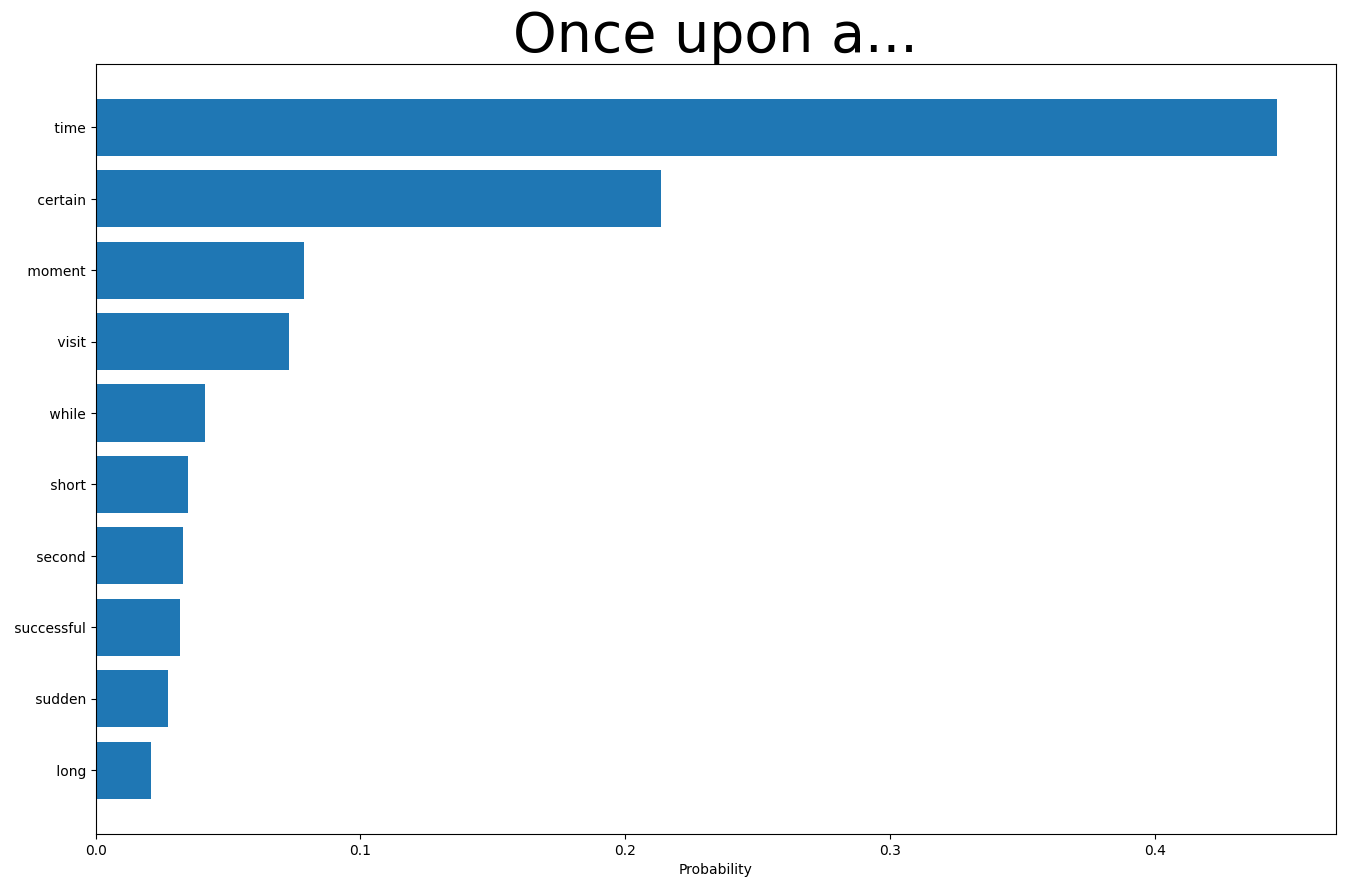

In [22]:
### YOUR CODE HERE ###

text = "Once upon a"   # change the input text here. For instance, try "I am Iron" and see what happens.
temperature = 1.0           # change the temperature here. 
                            # This determines how random the text generation is. 
                            # Lower values are more deterministic, higher values are more random.

### END CODE HERE ###

encoded_input = tokenizer(text, return_tensors='pt')
input_ids = encoded_input['input_ids']
attn_mask = encoded_input['attention_mask']
gen_tokens = model.generate(
    input_ids, 
    attention_mask=attn_mask,
    pad_token_id=tokenizer.eos_token_id,
    do_sample=True,
    temperature=temperature,
    max_length=100
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

# we will only look at the next token
k = 10
next_token = model(**encoded_input).logits[0, -1, :].detach()
top_k = next_token.topk(k).indices
top_k_tokens = tokenizer.batch_decode(top_k)

fig, ax = plt.subplots(figsize=(16, 10))
ax.barh(top_k_tokens, next_token[top_k].softmax(dim=0))
ax.invert_yaxis()
ax.set_xlabel('Probability')
ax.set_title(text + "...")
ax.title.set_fontsize(40)
plt.savefig("Next-word-prediction.png")
